# Airbnb Boston

In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

## <font color='red'> CRISP-DM: steps 1 and 2 Business and Data Understanding </font>

### Exploring calendar dataset

In [2]:
# loading the dataset, parsing dates
calendar = pd.read_csv("./data-boston/calendar.csv", parse_dates=['date'])
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [3]:
# how large is the dataset?
calendar.shape

(1308890, 4)

In [4]:
# let's see some statistics about numeric variables
calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [5]:
# columns of the dataset
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  object        
 3   price       643037 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 39.9+ MB


In [6]:
# let's see the number of distincts values of categorical variables
calendar.groupby(['date']).count()

,listing_id,available,price
date,,,
2016-09-06,3586,3586,570
2016-09-07,3586,3586,932
2016-09-08,3586,3586,999
2016-09-09,3586,3586,981
2016-09-10,3586,3586,956
...,...,...,...
2017-09-01,3586,3586,1795
2017-09-02,3586,3586,1798
2017-09-03,3586,3586,1802


In [7]:
# let's see the number of distincts values of categorical variables
calendar.groupby(['price']).count()

,listing_id,date,available
price,,,
"$1,000.00",460,460,460
"$1,002.00",5,5,5
"$1,004.00",1,1,1
"$1,006.00",1,1,1
"$1,007.00",3,3,3
...,...,...,...
$993.00,3,3,3
$995.00,69,69,69
$997.00,1,1,1


In [8]:
# convert price to float
calendar = pd.concat([calendar, calendar.price.replace('\$|\,', '', regex=True).astype(float).rename('price_num')], axis=1)

In [9]:
calendar.head()

,listing_id,date,available,price,price_num
0,12147973,2017-09-05,f,NaN,NaN
1,12147973,2017-09-04,f,NaN,NaN
2,12147973,2017-09-03,f,NaN,NaN
3,12147973,2017-09-02,f,NaN,NaN
4,12147973,2017-09-01,f,NaN,NaN


In [10]:
# let's see the number of distincts values of price_num > checking if de conversion is ok
calendar.groupby(['price']).mean()

,listing_id,price_num
price,,
"$1,000.00",6.941964e+06,1000.0
"$1,002.00",3.264664e+06,1002.0
"$1,004.00",7.633883e+06,1004.0
"$1,006.00",1.358562e+07,1006.0
"$1,007.00",5.536013e+06,1007.0
...,...,...
$993.00,8.253452e+06,993.0
$995.00,3.014693e+06,995.0
$997.00,1.122392e+07,997.0


In [11]:
# droping price str, rename price_num and check statistics
calendar = calendar.drop(labels=['price'], axis=1)
calendar.rename(columns={'price_num': 'price'}, inplace=True)
calendar.describe()

,listing_id,price
count,1.308890e+06,643037.000000
mean,8.442118e+06,198.438909
std,4.500149e+06,180.142913
min,3.353000e+03,11.000000
25%,4.679319e+06,85.000000
50%,8.578710e+06,150.000000
75%,1.279603e+07,255.000000
max,1.493346e+07,7163.000000


In [12]:
# creating a series with mean price per date
mean_price_per_date = calendar.groupby(['date']).price.mean()
mean_price_per_date.head()

date
2016-09-06    241.043860
2016-09-07    251.833691
2016-09-08    251.748749
2016-09-09    261.859327
2016-09-10    266.847280
Name: price, dtype: float64

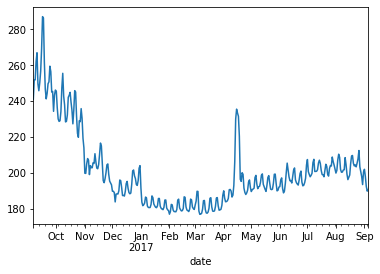

In [13]:
# plotting direct from dataframe
calendar.groupby(['date']).price.mean().plot();

In [14]:
# creating a series with moving average
mean_price_per_date.rolling(window=7).mean()

date
2016-09-06           NaN
2016-09-07           NaN
2016-09-08           NaN
2016-09-09           NaN
2016-09-10           NaN
                 ...    
2017-09-01    201.560475
2017-09-02    199.488927
2017-09-03    197.941568
2017-09-04    196.376402
2017-09-05    195.345060
Name: price, Length: 365, dtype: float64

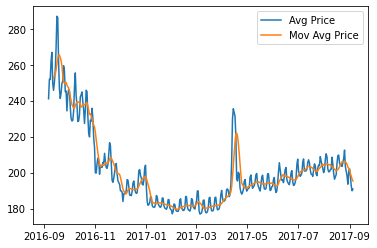

In [15]:
# plotting prices per date
plt.plot(mean_price_per_date.index, mean_price_per_date.values, label='Avg Price');
plt.plot(mean_price_per_date.rolling(window=7).mean().index, mean_price_per_date.rolling(window=7).mean().values, label='Mov Avg Price');
plt.legend();

In [16]:
# exploring avaiable variable
calendar.groupby(['available']).count()

,listing_id,date,price
available,,,
f,665853,665853,0
t,643037,643037,643037


In [17]:
# replacing true or false
available_dict = {'t': True, 'f': False}
calendar.replace({'available': available_dict}, inplace=True)

In [18]:
# checking the replace
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,NaN
1,12147973,2017-09-04,False,NaN
2,12147973,2017-09-03,False,NaN
3,12147973,2017-09-02,False,NaN
4,12147973,2017-09-01,False,NaN


In [19]:
calendar.groupby(['available']).count()

,listing_id,date,price
available,,,
False,665853,665853,0
True,643037,643037,643037


### Exploring listings dataset

In [20]:
# loading dataset
listings = pd.read_csv("./data-boston/listings.csv", parse_dates=['host_since', 'first_review', 'last_review'])
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [21]:
# list columns and dtypes
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3585 non-null   int64         
 1   listing_url                       3585 non-null   object        
 2   scrape_id                         3585 non-null   int64         
 3   last_scraped                      3585 non-null   object        
 4   name                              3585 non-null   object        
 5   summary                           3442 non-null   object        
 6   space                             2528 non-null   object        
 7   description                       3585 non-null   object        
 8   experiences_offered               3585 non-null   object        
 9   neighborhood_overview             2170 non-null   object        
 10  notes                             1610 non-null 

In [22]:
# looking basic statistics
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### Exploring reviews dataset

In [23]:
reviews = pd.read_csv("./data-boston/reviews.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


## 1. What is the average price per neighbourhood?

## <font color='red'> Descriptive Analysis </font>

In [24]:
# checking columns related with neighbourhood
neig_cols = [col for col in listings.columns if 'neig' in col]

In [25]:
listings[neig_cols]

,neighborhood_overview,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,"Roslindale is quiet, convenient and friendly. ...",Roslindale,Roslindale,Roslindale,NaN
1,"The room is in Roslindale, a diverse and prima...",Roslindale,Roslindale,Roslindale,NaN
2,The LOCATION: Roslindale is a safe and diverse...,Roslindale,Roslindale,Roslindale,NaN
3,Roslindale is a lovely little neighborhood loc...,NaN,NaN,Roslindale,NaN
4,"I love the proximity to downtown, the neighbor...",Roslindale,Roslindale,Roslindale,NaN
...,...,...,...,...,...
3580,NaN,Somerville,Somerville,Charlestown,NaN
3581,NaN,NaN,NaN,Allston,NaN
3582,"Cambridge is a short walk into Boston, and set...",NaN,NaN,Charlestown,NaN
3583,NaN,Somerville,Somerville,Charlestown,NaN


In [26]:
# counting unique values to understand the best variable that describes a neighbourhood
listings[neig_cols].nunique()

neighborhood_overview           1728
host_neighbourhood                53
neighbourhood                     30
neighbourhood_cleansed            25
neighbourhood_group_cleansed       0
dtype: int64

In [27]:
listings[neig_cols].nunique()/listings[neig_cols].count()

neighborhood_overview           0.796313
host_neighbourhood              0.016328
neighbourhood                   0.009862
neighbourhood_cleansed          0.006974
neighbourhood_group_cleansed         NaN
dtype: float64

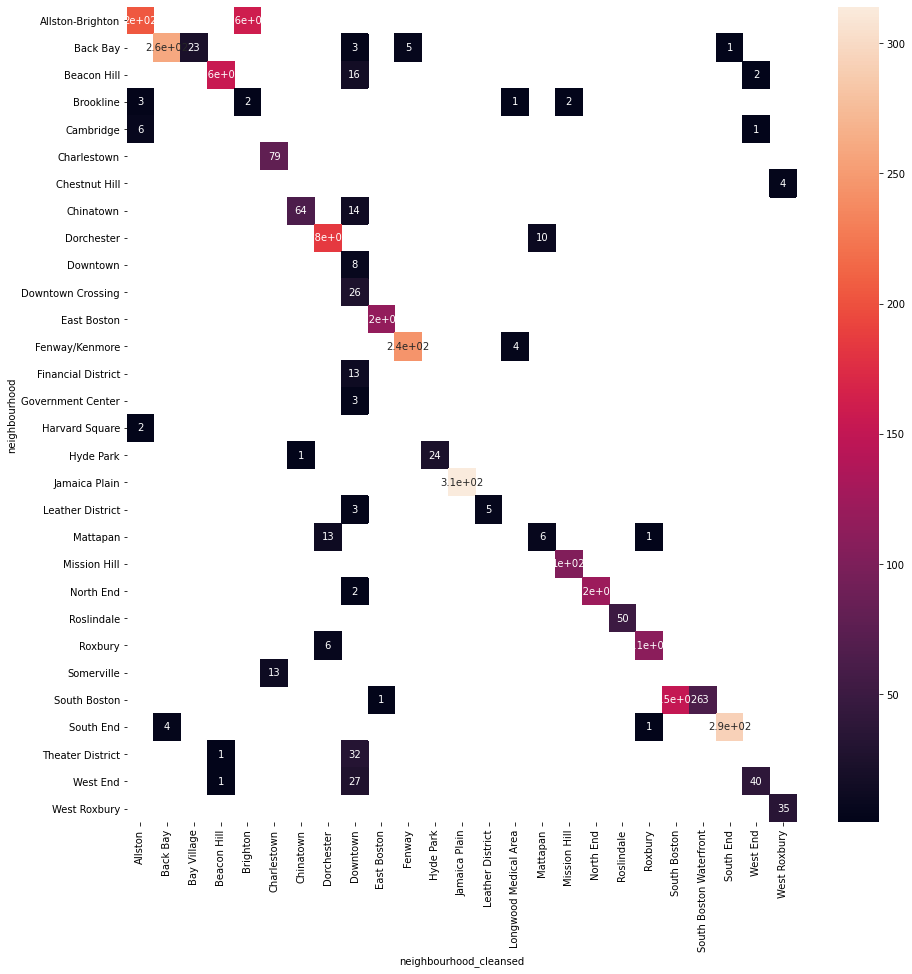

In [28]:
# comparing varibles to select the best
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(listings.groupby(['neighbourhood', 'neighbourhood_cleansed']).id.count().unstack(), annot=True);

In [29]:
# selected variables
listings[['neighbourhood_cleansed', 'price']]

,neighbourhood_cleansed,price
0,Roslindale,$250.00
1,Roslindale,$65.00
2,Roslindale,$65.00
3,Roslindale,$75.00
4,Roslindale,$79.00
...,...,...
3580,Charlestown,$69.00
3581,Allston,$150.00
3582,Charlestown,$198.00
3583,Charlestown,$65.00


In [30]:
# adjusting price to num
listings.price.replace('\$|\,', '', regex=True).rename('price_num')

0       250.00
1        65.00
2        65.00
3        75.00
4        79.00
         ...  
3580     69.00
3581    150.00
3582    198.00
3583     65.00
3584     65.00
Name: price_num, Length: 3585, dtype: object

In [31]:
listings = pd.concat([listings.drop(labels=['price'], axis=1), listings.price.replace('\$|\,', '', regex=True).astype(float)], axis=1)

In [32]:
# grouping and sorting the mean price per neighbourhood
price_per_neig = listings.groupby('neighbourhood_cleansed').price.mean().sort_values()
price_per_neig

neighbourhood_cleansed
Mattapan                    75.125000
Hyde Park                   86.548387
Dorchester                  91.639405
Roslindale                  98.428571
West Roxbury               107.108696
Allston                    112.307692
Brighton                   118.767568
East Boston                119.153333
Mission Hill               121.967742
Longwood Medical Area      138.444444
Jamaica Plain              138.478134
Roxbury                    146.333333
South Boston               187.609195
North End                  195.678322
Charlestown                198.045045
South End                  204.349693
West End                   209.591837
Fenway                     220.393103
Beacon Hill                224.443299
Chinatown                  232.352113
Downtown                   236.459302
Back Bay                   240.950331
Leather District           253.600000
Bay Village                266.833333
South Boston Waterfront    306.060241
Name: price, dtype: float64

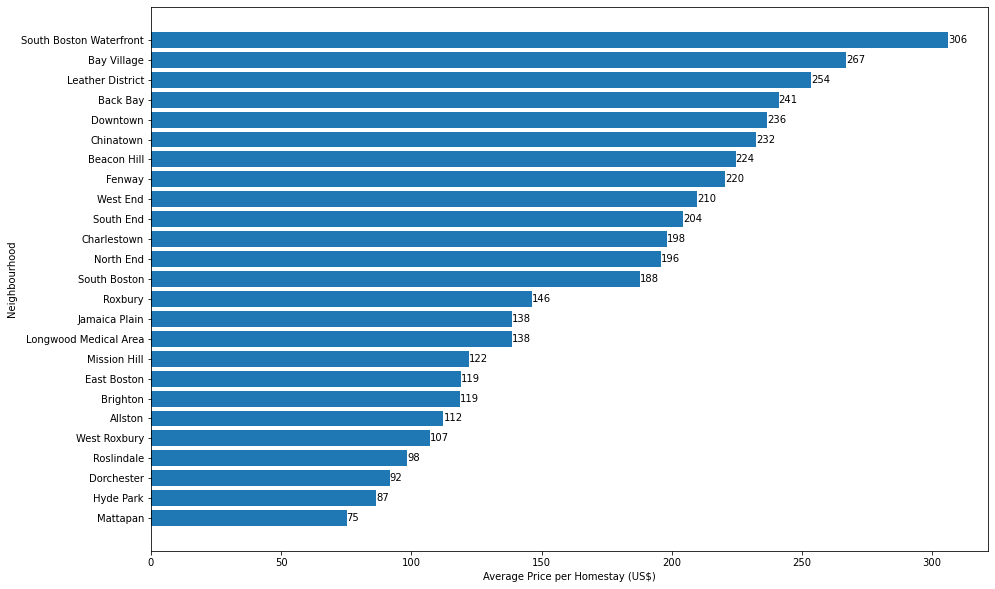

In [33]:
# plotting a bar chart
plt.subplots(figsize=(15,10));
plt.barh(price_per_neig.index, price_per_neig.values);
plt.xlabel('Average Price per Homestay (US$)')
plt.ylabel('Neighbourhood')

for i in range(len(price_per_neig.values)):
    plt.text(price_per_neig.values[i], i, f"{price_per_neig.values[i]:.0f}", va='center');

## 2. What is the busiest epoch of the year?

## <font color='red'> Descriptive Analysis </font>

In [34]:
# start rembering the columns of the calendar
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  bool          
 3   price       643037 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 31.2 MB


<AxesSubplot:xlabel='listing_id'>

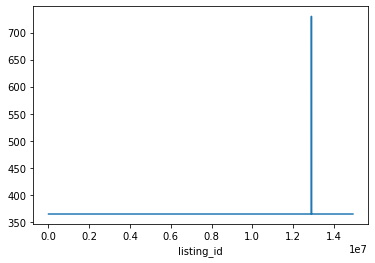

In [35]:
# looking if every id has the same count of rows
calendar.groupby('listing_id').date.count().plot()

In [36]:
# looking an id tha has more than the others
calendar.groupby('listing_id').date.count().idxmax()

12898806

In [37]:
calendar.groupby('listing_id').date.count()[calendar.groupby('listing_id').date.count() > 365]

listing_id
12898806    730
Name: date, dtype: int64

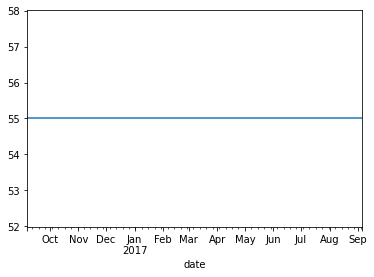

In [38]:
# pick an id and looking if the price changes over the year
calendar[calendar.listing_id == 14928000].groupby('date').price.mean().plot();

Text(0, 0.5, 'Unavailble Homestays')

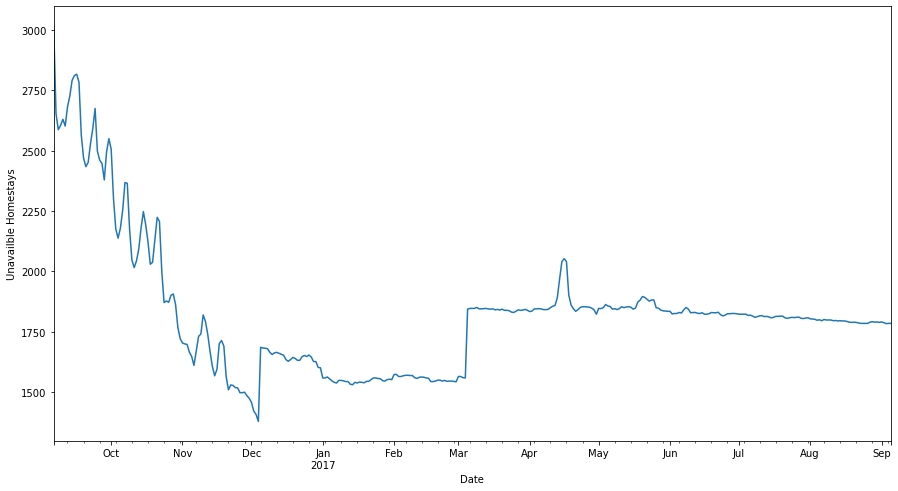

In [39]:
# plot the occupation by date
plt.subplots(figsize=(15,8))
calendar[calendar.available == False].groupby('date').listing_id.count().plot();
plt.xlabel('Date')
plt.ylabel('Unavailble Homestays')

In [40]:
occup_by_date = calendar[calendar.available == False].groupby('date').listing_id.count()
occup_by_date.head()

date
2016-09-06    3016
2016-09-07    2654
2016-09-08    2587
2016-09-09    2605
2016-09-10    2630
Name: listing_id, dtype: int64

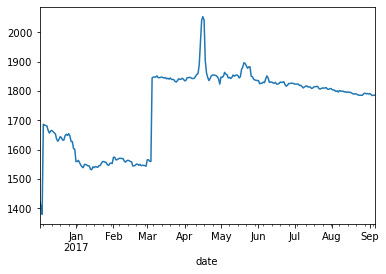

In [41]:
# it appears that the closiest dates have the high occupation rate, this makes sense because there are people that rent a house
# close to the date of use. I remove the closiest dates (and I'll cannot talk abou the occuppation of these months),
# by other hand, the data show more stability and could be a better proxy of busiest epoch
occup_by_date[occup_by_date.index > pd.to_datetime('2016-12-01')].plot();

In [42]:
# look for the specific date of the spike in the chart
occup_by_date[occup_by_date.index > pd.to_datetime('2016-12-01')].idxmax()

Timestamp('2017-04-16 00:00:00')

In [43]:
# 2 considerations, jan-mar is the coldest months in Boston and is expected to have a lower occupation rate
# In April, 17 2017 occured the Boston Marathon and is the Patriot's Day, a holliday in Massachusetts

## 3. Can we predict house's price based on prior data?

## <font color='red'> CRISP-DM: step 3 Data Preparation </font>

In [44]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3585 non-null   int64         
 1   listing_url                       3585 non-null   object        
 2   scrape_id                         3585 non-null   int64         
 3   last_scraped                      3585 non-null   object        
 4   name                              3585 non-null   object        
 5   summary                           3442 non-null   object        
 6   space                             2528 non-null   object        
 7   description                       3585 non-null   object        
 8   experiences_offered               3585 non-null   object        
 9   neighborhood_overview             2170 non-null   object        
 10  notes                             1610 non-null 

In [45]:
# vars that doesn't make sense for predicting price
drop_vars1 = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'description', 'thumbnail_url', 'medium_url',
              'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
              'weekly_price', 'monthly_price']
drop_vars1

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'description',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_thumbnail_url',
 'host_picture_url',
 'weekly_price',
 'monthly_price']

In [46]:
# dropping that vars
listings_drop1 = listings.drop(labels=drop_vars1, axis=1)
listings_drop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   space                             2528 non-null   object        
 1   experiences_offered               3585 non-null   object        
 2   neighborhood_overview             2170 non-null   object        
 3   notes                             1610 non-null   object        
 4   transit                           2295 non-null   object        
 5   access                            2096 non-null   object        
 6   interaction                       2031 non-null   object        
 7   house_rules                       2393 non-null   object        
 8   host_since                        3585 non-null   datetime64[ns]
 9   host_location                     3574 non-null   object        
 10  host_about                        2276 non-null 

In [47]:
# counting distinct values per column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(listings_drop1.nunique())

space                               2268
experiences_offered                    1
neighborhood_overview               1728
notes                               1269
transit                             1859
access                              1762
interaction                         1617
house_rules                         1928
host_since                          1281
host_location                        176
host_about                          1240
host_response_time                     4
host_response_rate                    52
host_acceptance_rate                  72
host_is_superhost                      2
host_neighbourhood                    53
host_listings_count                   35
host_total_listings_count             35
host_verifications                    83
host_has_profile_pic                   2
host_identity_verified                 2
street                              1239
neighbourhood                         30
neighbourhood_cleansed                25
neighbourhood_gr

In [48]:
# another vars that doesn't make sense to predict price
drop_vars2 = ['space',
    'experiences_offered',
    'neighborhood_overview',
    'notes',
    'transit',
    'access',
    'interaction',
    'house_rules',
    'host_location',
    'host_about',
    'host_verifications',
    'street',
    'neighbourhood',
    'neighbourhood_group_cleansed',
    'city',
    'state',
    'zipcode',
    'smart_location',
    'country_code',
    'country',
    'amenities',
    'has_availability',
    'calendar_last_scraped',
    'requires_license',
    'license',
    'jurisdiction_names',
    ]
drop_vars2

['space',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_location',
 'host_about',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'smart_location',
 'country_code',
 'country',
 'amenities',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'license',
 'jurisdiction_names']

In [49]:
# dropping that vars
listings_drop2 = listings_drop1.drop(labels=drop_vars2, axis=1)
listings_drop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   host_since                        3585 non-null   datetime64[ns]
 1   host_response_time                3114 non-null   object        
 2   host_response_rate                3114 non-null   object        
 3   host_acceptance_rate              3114 non-null   object        
 4   host_is_superhost                 3585 non-null   object        
 5   host_neighbourhood                3246 non-null   object        
 6   host_listings_count               3585 non-null   int64         
 7   host_total_listings_count         3585 non-null   int64         
 8   host_has_profile_pic              3585 non-null   object        
 9   host_identity_verified            3585 non-null   object        
 10  neighbourhood_cleansed            3585 non-null 

In [50]:
# replacing true or false
bool_dict = {'t': True, 'f': False}
listings_drop2.replace({'host_is_superhost': bool_dict,
    'host_has_profile_pic': bool_dict,
    'host_identity_verified': bool_dict,
    'is_location_exact': bool_dict,
    'instant_bookable': bool_dict,
    'require_guest_profile_picture': bool_dict,
    'require_guest_phone_verification': bool_dict,
    }, inplace=True)

In [51]:
listings_drop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   host_since                        3585 non-null   datetime64[ns]
 1   host_response_time                3114 non-null   object        
 2   host_response_rate                3114 non-null   object        
 3   host_acceptance_rate              3114 non-null   object        
 4   host_is_superhost                 3585 non-null   bool          
 5   host_neighbourhood                3246 non-null   object        
 6   host_listings_count               3585 non-null   int64         
 7   host_total_listings_count         3585 non-null   int64         
 8   host_has_profile_pic              3585 non-null   bool          
 9   host_identity_verified            3585 non-null   bool          
 10  neighbourhood_cleansed            3585 non-null 

In [52]:
# checking var type
listings_drop2.security_deposit

0           NaN
1        $95.00
2           NaN
3       $100.00
4           NaN
         ...   
3580     $95.00
3581    $100.00
3582        NaN
3583    $100.00
3584        NaN
Name: security_deposit, Length: 3585, dtype: object

In [53]:
# adjusting currency to float
price_dict = {'\$|\,': ''}
price_types = {'security_deposit': float,
               'cleaning_fee': float,
               'extra_people': float}
listings_drop2.replace({'security_deposit': price_dict,
                        'cleaning_fee': price_dict,
                        'extra_people': price_dict}, regex=True, inplace=True)

In [54]:
listings_drop2 = listings_drop2.astype(price_types)

In [55]:
# checking if it is float
listings_drop2.security_deposit

0         NaN
1        95.0
2         NaN
3       100.0
4         NaN
        ...  
3580     95.0
3581    100.0
3582      NaN
3583    100.0
3584      NaN
Name: security_deposit, Length: 3585, dtype: float64

In [56]:
# vars overview
listings_drop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   host_since                        3585 non-null   datetime64[ns]
 1   host_response_time                3114 non-null   object        
 2   host_response_rate                3114 non-null   object        
 3   host_acceptance_rate              3114 non-null   object        
 4   host_is_superhost                 3585 non-null   bool          
 5   host_neighbourhood                3246 non-null   object        
 6   host_listings_count               3585 non-null   int64         
 7   host_total_listings_count         3585 non-null   int64         
 8   host_has_profile_pic              3585 non-null   bool          
 9   host_identity_verified            3585 non-null   bool          
 10  neighbourhood_cleansed            3585 non-null 

In [57]:
# some statistics of num vars
listings_drop2.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,security_deposit,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,1342.000000,...,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,3585.000000,2829.000000,3585.000000
mean,58.902371,58.902371,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,324.698212,...,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,12.733891,1.970908,173.925802
std,171.119663,171.119663,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,328.873075,...,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,29.415076,2.120561,148.331321
min,0.000000,0.000000,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,95.000000,...,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.010000,10.000000
25%,1.000000,1.000000,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,100.000000,...,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.480000,85.000000
50%,2.000000,2.000000,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,250.000000,...,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.170000,150.000000
75%,7.000000,7.000000,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,450.000000,...,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,2.720000,220.000000
max,749.000000,749.000000,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,4500.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000,4000.000000


In [58]:
# checking dtypes
listings_drop2.select_dtypes(exclude=['object', 'datetime']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_is_superhost                 3585 non-null   bool   
 1   host_listings_count               3585 non-null   int64  
 2   host_total_listings_count         3585 non-null   int64  
 3   host_has_profile_pic              3585 non-null   bool   
 4   host_identity_verified            3585 non-null   bool   
 5   latitude                          3585 non-null   float64
 6   longitude                         3585 non-null   float64
 7   is_location_exact                 3585 non-null   bool   
 8   accommodates                      3585 non-null   int64  
 9   bathrooms                         3571 non-null   float64
 10  bedrooms                          3575 non-null   float64
 11  beds                              3576 non-null   float64
 12  square

In [59]:
# checking numeric vars with NaN values
listings_drop2.select_dtypes(exclude=['object', 'datetime']).isnull().sum()[listings_drop2.select_dtypes(exclude=['object', 'datetime']).isnull().sum() > 0]

bathrooms                        14
bedrooms                         10
beds                              9
square_feet                    3529
security_deposit               2243
cleaning_fee                   1107
review_scores_rating            813
review_scores_accuracy          823
review_scores_cleanliness       818
review_scores_checkin           820
review_scores_communication     818
review_scores_location          822
review_scores_value             821
reviews_per_month               756
dtype: int64

In [60]:
# inputing values for NaN
values = {'bathrooms': listings_drop2.bathrooms.mean(),
         'bedrooms': listings_drop2.bedrooms.mean(),
         'beds': listings_drop2.beds.mean(),
         'square_feet': listings_drop2.square_feet.mean(),
         'security_deposit': 0,
         'cleaning_fee': 0,
         'review_scores_rating': listings_drop2.review_scores_rating.mean(),
         'review_scores_accuracy': listings_drop2.review_scores_accuracy.mean(),
         'review_scores_cleanliness': listings_drop2.review_scores_cleanliness.mean(),
         'review_scores_checkin': listings_drop2.review_scores_checkin.mean(),
         'review_scores_communication': listings_drop2.review_scores_communication.mean(),
         'review_scores_location': listings_drop2.review_scores_location.mean(),
         'review_scores_value': listings_drop2.review_scores_value.mean(),
         'reviews_per_month': listings_drop2.reviews_per_month.mean()}
listings_drop2.fillna(values, inplace=True)

In [61]:
# checking values
values

{'bathrooms': 1.221646597591711,
 'bedrooms': 1.255944055944056,
 'beds': 1.6090604026845639,
 'square_feet': 858.4642857142857,
 'security_deposit': 0,
 'cleaning_fee': 0,
 'review_scores_rating': 91.91666666666667,
 'review_scores_accuracy': 9.43157132512672,
 'review_scores_cleanliness': 9.25804119985544,
 'review_scores_checkin': 9.64629294755877,
 'review_scores_communication': 9.646548608601373,
 'review_scores_location': 9.414042707202317,
 'review_scores_value': 9.16823444283647,
 'reviews_per_month': 1.970908448214916}

In [62]:
# checking if NaN values in num vars is empty
listings_drop2.select_dtypes(exclude=['object', 'datetime']).isnull().sum()[listings_drop2.select_dtypes(exclude=['object', 'datetime']).isnull().sum() > 0]

Series([], dtype: int64)

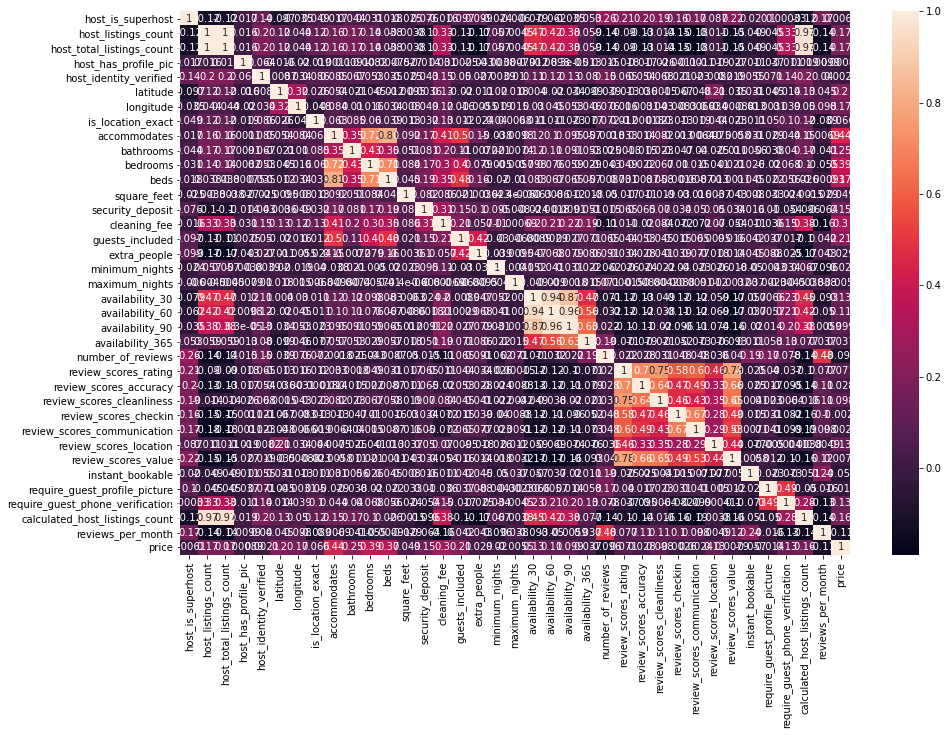

In [63]:
# plotting correlation matrix
plt.subplots(figsize=(15,10))
sns.heatmap(listings_drop2.corr(), annot=True);

## <font color='red'> CRISP-DM: steps 4 and 5 Modeling and Evaluation </font>

## 1st model: using only num vars

In [64]:
# instantiate model, splitting X and y and splitting train and test > using only num vars
lm = LinearRegression(normalize=True)

X = listings_drop2.select_dtypes(exclude=['object', 'datetime']).drop(labels=['price'], axis=1)
y = listings_drop2.select_dtypes(exclude=['object', 'datetime']).price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
# fitting model and predicting values using
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [66]:
# r2 score for train data
r2_score(y_train, y_train_pred)

0.337962314086526

In [67]:
# r2 score for test data
r2_score(y_test, y_test_pred)

-6.834193052838912

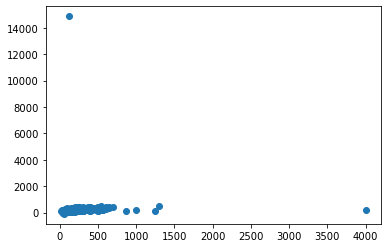

In [68]:
# plotting test data
plt.scatter(y_test, y_test_pred)

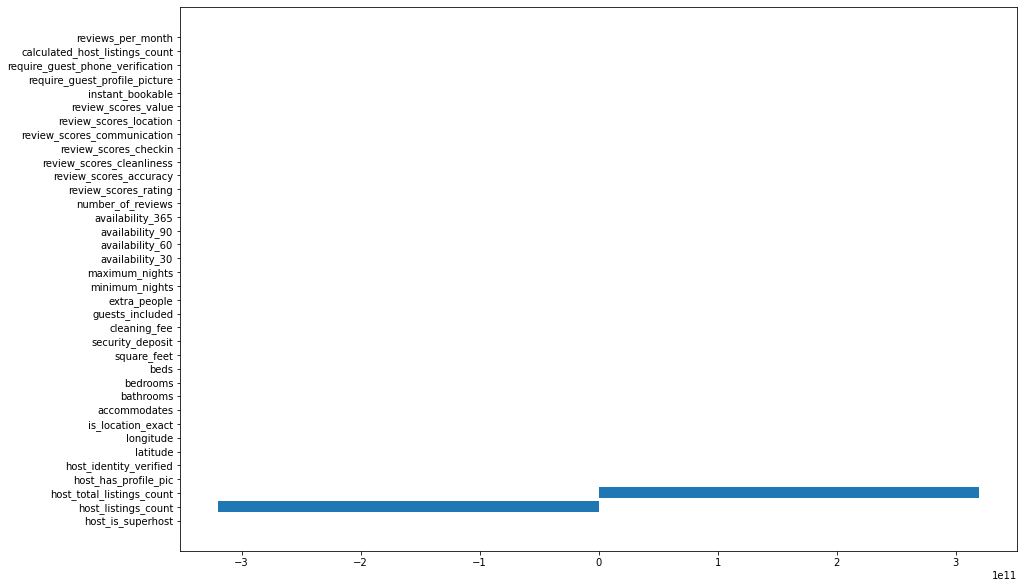

In [69]:
plt.subplots(figsize=(15,10))
plt.barh(X_test.columns, lm.coef_);

## 2nd model: changing seed for splitting test and train

In [70]:
# instantiate model, splitting X and y and splitting train and test > using only num vars
lm = LinearRegression(normalize=True)

X = listings_drop2.select_dtypes(exclude=['object', 'datetime']).drop(labels=['price'], axis=1)
y = listings_drop2.select_dtypes(exclude=['object', 'datetime']).price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [71]:
# fitting model and predicting values using
lm.fit(X_train, y_train)

LinearRegression(normalize=True)

In [72]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [73]:
# r2 score for train data
r2_score(y_train, y_train_pred)

0.2907776873072534

In [74]:
# r2 score for test data
r2_score(y_test, y_test_pred)

0.309975080251227

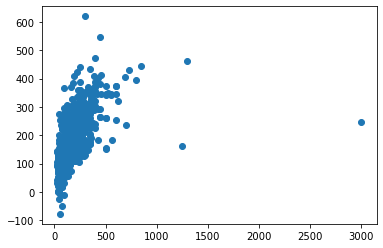

In [75]:
# plotting test data
plt.scatter(y_test, y_test_pred)

## 3rd model: using Ridge to reduce variance (compare to 1st model)

In [76]:
# instantiate model, splitting X and y and splitting train and test > using only num vars
lm = RidgeCV(alphas=[0.1, 1 , 10, 100, 1000, 10000, 100000], normalize=True)

X = listings_drop2.select_dtypes(exclude=['object', 'datetime']).drop(labels=['price'], axis=1)
y = listings_drop2.select_dtypes(exclude=['object', 'datetime']).price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [77]:
# fitting model and predicting values using
lm.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
        normalize=True)

In [78]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [79]:
# r2 score for train data
r2_score(y_train, y_train_pred)

0.33581207894041165

In [80]:
# r2 score for test data
r2_score(y_test, y_test_pred)

-336.1838278703427

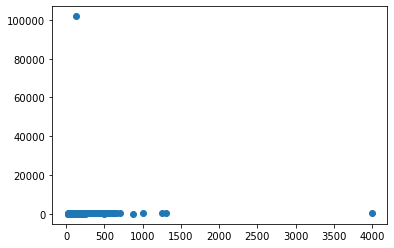

In [81]:
# plotting test data
plt.scatter(y_test, y_test_pred)

## 4th model: using Lasso to reduce vars used (compare to 1st model)

In [82]:
# instantiate model, splitting X and y and splitting train and test > using only num vars
lm = LassoCV(normalize=True)

In [83]:
X = listings_drop2.select_dtypes(exclude=['object', 'datetime']).drop(labels=['price'], axis=1)
y = listings_drop2.select_dtypes(exclude=['object', 'datetime']).price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [84]:
# fitting model and predicting values using
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [85]:
# r2 score for train data
r2_score(y_train, y_train_pred)

0.33648665833173563

In [86]:
# r2 score for test data
r2_score(y_test, y_test_pred)

0.23399438277852347

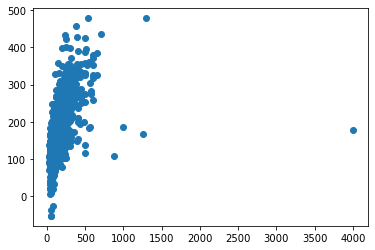

In [87]:
# plotting test data
plt.scatter(y_test, y_test_pred)

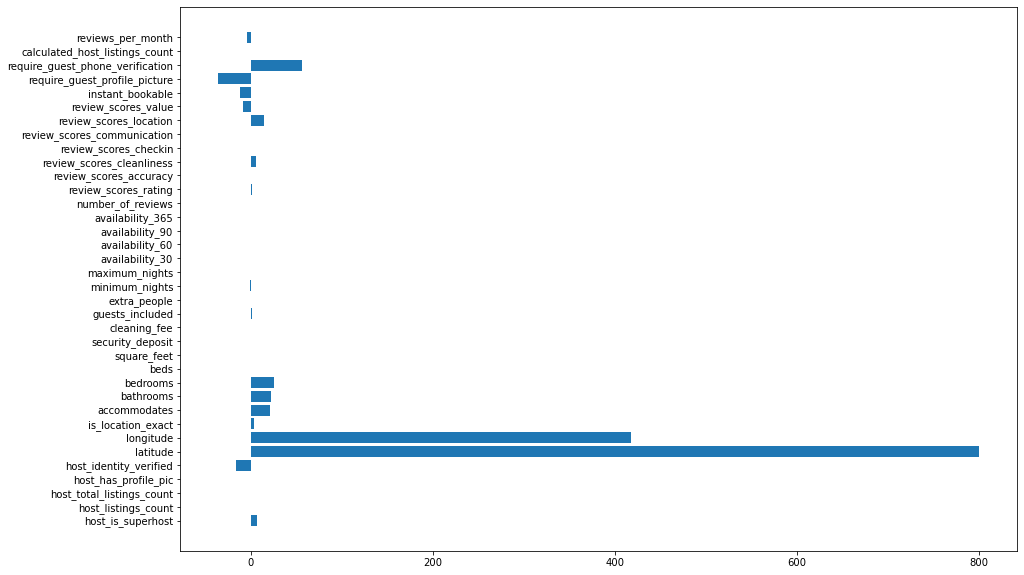

In [88]:
plt.subplots(figsize=(15,10))
plt.barh(X_test.columns, lm.coef_);

In [89]:
lm.coef_

array([ 6.94403016e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.67978138e+01,  8.00529046e+02,  4.17782763e+02,  2.77295868e+00,
        2.06167433e+01,  2.18263443e+01,  2.50334570e+01,  0.00000000e+00,
       -1.21778292e-02,  2.27905022e-02,  1.79502058e-01,  1.62079454e+00,
       -2.17621303e-01, -5.95774401e-01,  0.00000000e+00,  4.97731950e-01,
        0.00000000e+00,  0.00000000e+00, -1.40606544e-02, -1.65664366e-01,
        6.48244247e-01, -0.00000000e+00,  5.37836886e+00,  0.00000000e+00,
        0.00000000e+00,  1.40548859e+01, -8.45924476e+00, -1.21979466e+01,
       -3.59985892e+01,  5.59388933e+01,  8.70614710e-03, -3.91735239e+00])

## 5th model: using ElasticNet L1 and L2 penalty (compare to 1st model)

In [90]:
# instantiate model, splitting X and y and splitting train and test > using only num vars
lm = ElasticNetCV(normalize=True)

In [91]:
X = listings_drop2.select_dtypes(exclude=['object', 'datetime']).drop(labels=['price'], axis=1)
y = listings_drop2.select_dtypes(exclude=['object', 'datetime']).price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [92]:
# fitting model and predicting values using
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [93]:
# r2 score for train data
r2_score(y_train, y_train_pred)

0.23474791055803923

In [94]:
# r2 score for test data
r2_score(y_test, y_test_pred)

-927.5862527799433

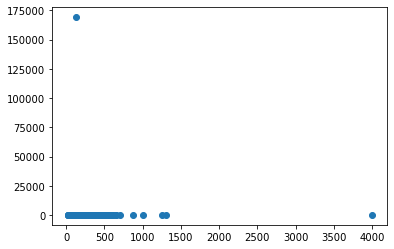

In [95]:
# plotting test data
plt.scatter(y_test, y_test_pred)

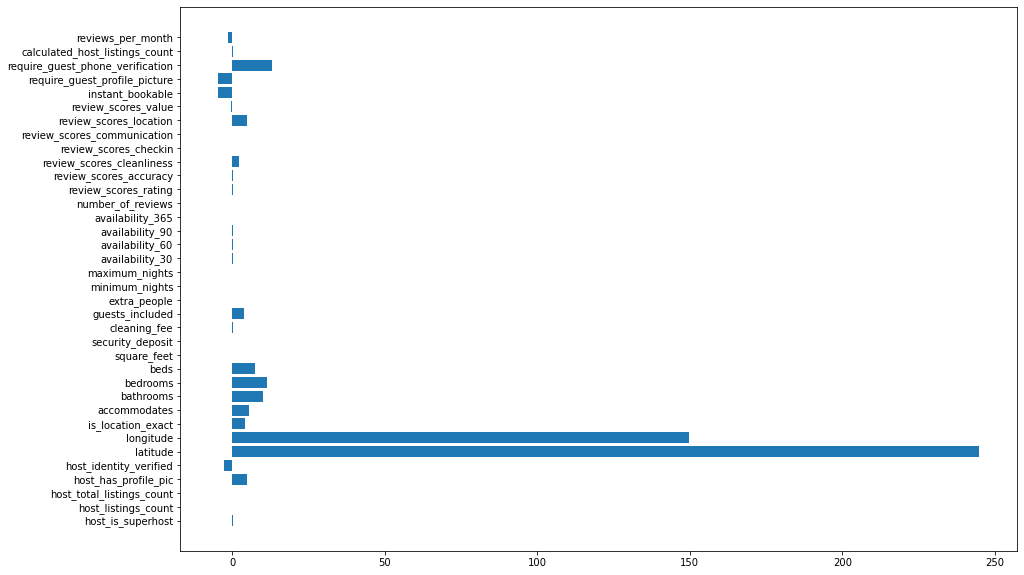

In [96]:
plt.subplots(figsize=(15,10))
plt.barh(X_test.columns, lm.coef_);

In [97]:
# checkin outlier
np.argmax(y_test_pred)

902

In [98]:
# looking inputs for the outlier
X_test.iloc[902]

host_is_superhost                        False
host_listings_count                         13
host_total_listings_count                   13
host_has_profile_pic                      True
host_identity_verified                    True
latitude                             42.365709
longitude                           -71.055603
is_location_exact                         True
accommodates                                 2
bathrooms                                  1.0
bedrooms                                   1.0
beds                                       1.0
square_feet                         858.464286
security_deposit                           0.0
cleaning_fee                              45.0
guests_included                              1
extra_people                               0.0
minimum_nights                               1
maximum_nights                        99999999
availability_30                              3
availability_60                             10
availability_

In [99]:
# looking the mean values of other inputs
X_test.drop(X_test.index[902]).mean()

host_is_superhost                     0.102326
host_listings_count                  58.973953
host_total_listings_count            58.973953
host_has_profile_pic                  0.997209
host_identity_verified                0.717209
latitude                             42.339497
longitude                           -71.084939
is_location_exact                     0.844651
accommodates                          3.028837
bathrooms                             1.207130
bedrooms                              1.253045
beds                                  1.616017
square_feet                         858.425615
security_deposit                    115.346047
cleaning_fee                         46.768372
guests_included                       1.447442
extra_people                         11.133023
minimum_nights                        3.278140
maximum_nights                      841.960930
availability_30                       8.520930
availability_60                      21.455814
availability_

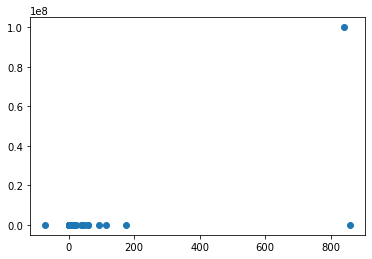

In [100]:
# plotting outlier vs mean
plt.scatter(X_test.drop(X_test.index[902]).mean(), X_test.iloc[902])

In [101]:
# maximun nights is an outlier: in Lasso Regression we don't see the problem, because Lasso puts maximun nights coef to 0

## 6th model: starts to use categorical variables

In [102]:
df = pd.get_dummies(listings_drop2, columns=listings_drop2.select_dtypes('object').columns, drop_first=True)

In [103]:
# instantiate model, splitting X and y and splitting train and test > using only num vars
lm = LassoCV(normalize=True)

X = df.select_dtypes(exclude=['datetime']).drop(labels=['price'], axis=1)
y = df.select_dtypes(exclude=['datetime']).price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [104]:
# fitting model and predicting values using
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [105]:
# r2 score for train data
r2_score(y_train, y_train_pred)

0.5085067989234919

In [106]:
# r2 score for test data
r2_score(y_test, y_test_pred)

0.2786075965256979

(0.0, 700.0)

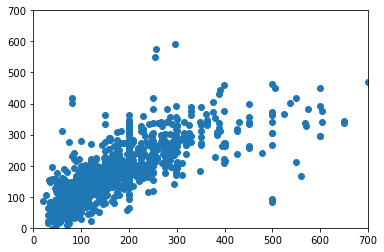

In [107]:
# plotting test data
plt.scatter(y_test, y_test_pred)
plt.xlim(0, 700)
plt.ylim(0, 700)

In [108]:
coefs = pd.concat([pd.DataFrame(X_test.columns), pd.DataFrame(lm.coef_), pd.DataFrame(abs(lm.coef_))], axis=1)
coefs.columns = ['var', 'coef', 'coef_abs']
coefs.sort_values('coef_abs', ascending=False).head(20)

,var,coef,coef_abs
6,longitude,433.514481,433.514481
5,latitude,405.413599,405.413599
297,cancellation_policy_super_strict_30,342.936601,342.936601
277,calendar_updated_30 months ago,302.888922,302.888922
264,calendar_updated_16 months ago,257.699573,257.699573
107,host_acceptance_rate_45%,-251.503109,251.503109
170,host_neighbourhood_Chelsea,238.094966,238.094966
265,calendar_updated_17 months ago,185.588047,185.588047
168,host_neighbourhood_Central Business District,-151.220088,151.220088
273,calendar_updated_25 months ago,86.262227,86.262227


## 7th model: removing max and min nights

In [109]:
df = pd.get_dummies(listings_drop2, columns=listings_drop2.select_dtypes('object').columns, drop_first=True)

In [110]:
# checking columns with night
df[[col for col in df.columns if 'night' in col]]

,minimum_nights,maximum_nights
0,2,1125
1,2,15
2,3,45
3,1,1125
4,2,31
...,...,...
3580,2,1125
3581,3,365
3582,3,12
3583,1,13


In [111]:
# dropping that columns
df.drop(labels=['minimum_nights', 'maximum_nights'], axis=1, inplace=True)

In [112]:
# checking if it's work
df[[col for col in df.columns if 'night' in col]]

""
0
1
2
3
4
...
3580
3581
3582
3583


In [120]:
# instantiate model, splitting X and y and splitting train and test > using only num vars
lm = LassoCV(normalize=True)

X = df.select_dtypes(exclude=['datetime']).drop(labels=['price'], axis=1)
y = df.select_dtypes(exclude=['datetime']).price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [121]:
# fitting model and predicting values using
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [122]:
# r2 score for train data
r2_score(y_train, y_train_pred)

0.40086681230166477

In [123]:
# r2 score for test data
r2_score(y_test, y_test_pred)

0.38666913903469124

Text(0, 0.5, 'Predicted Price (US$)')

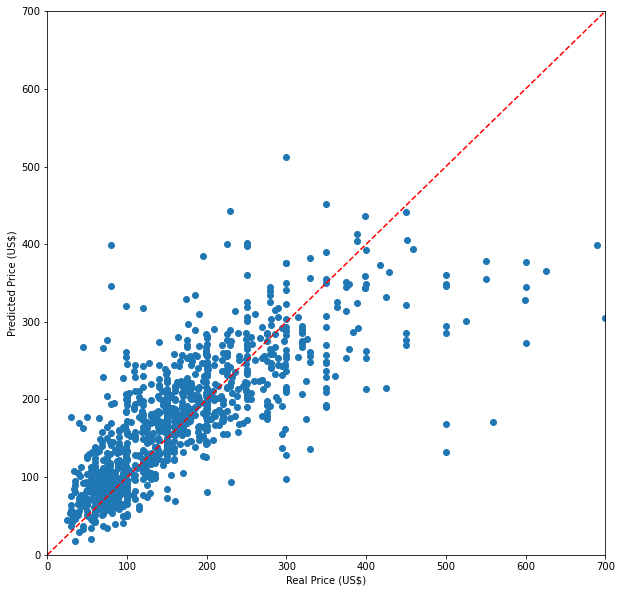

In [124]:
# plotting test data
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_test_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.xlim(0, 700)
plt.ylim(0, 700)
plt.xlabel('Real Price (US$)')
plt.ylabel('Predicted Price (US$)')

In [125]:
coefs = pd.concat([pd.DataFrame(X_test.columns), pd.DataFrame(lm.coef_), pd.DataFrame(abs(lm.coef_))], axis=1)
coefs.columns = ['var', 'coef', 'coef_abs']
coefs.sort_values('coef_abs', ascending=False).head(20)

,var,coef,coef_abs
5,latitude,445.646787,445.646787
6,longitude,372.846062,372.846062
275,calendar_updated_30 months ago,241.933474,241.933474
262,calendar_updated_16 months ago,208.459587,208.459587
263,calendar_updated_17 months ago,189.762760,189.762760
168,host_neighbourhood_Chelsea,177.621646,177.621646
113,host_acceptance_rate_54%,117.234764,117.234764
166,host_neighbourhood_Central Business District,-110.121207,110.121207
295,cancellation_policy_super_strict_30,59.344982,59.344982
251,room_type_Shared room,-49.923052,49.923052
